In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Gun 
df_gun = pd.read_csv('../dataset/gun-violence-data_01-2013_03-2018.csv')
# df_gun_violence = pd.read_csv('https://media.githubusercontent.com/media/Cng000/Gun-violence-analysis/gun-violence-data/dataset/gun-violence-data_01-2013_03-2018.csv')

In [3]:
# Population
df_population = pd.read_csv('../dataset/state_population_by_year.csv')

In [4]:
# Education 
df_edu = pd.read_csv('../dataset/ACS_17_1YR_B06009_with_ann.csv',skiprows=1)

In [5]:
# applying ETL to dataset 
df_population.drop(df_population.index[0],inplace=True)
df_population.drop(columns=['rescen42010','resbase42010'],inplace=True)


In [6]:
df_population.head()

,GEO.id,GEO.id2,GEO.display-label,2010,2011,2012,2013,2014,2015,2016,2017
1,0400000US01,1.0,Alabama,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747
2,0400000US02,2.0,Alaska,714015,722259,730825,736760,736759,737979,741522,739795
3,0400000US04,4.0,Arizona,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
4,0400000US05,5.0,Arkansas,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279
5,0400000US06,6.0,California,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653


In [7]:
# df_edu.head()

In [8]:
# df_edu_new.shape

In [9]:
df_edu_new = df_edu[['Estimate; Total:','Geography','Estimate; Total: - Less than high school graduate','Estimate; Total: - Some college or associate\'s degree',
      'Estimate; Total: - Bachelor\'s degree']]
# df_edu_new

In [10]:
# df_edu_new = df_edu_new.rename(index=str, columns={"Geography": "state"})
# df_population = df_population.rename(index=str,columns={"GEO.display-label":"state"})

In [11]:
# df_final = df_edu_new.merge(df_population, how='inner', on='state')
# df_final

In [12]:
df_edu_new["% of less than hs"] = df_edu_new['Estimate; Total: - Less than high school graduate']/df_edu_new['Estimate; Total:']
df_edu_new["% of some college or associate"] = df_edu_new['Estimate; Total: - Some college or associate\'s degree']/df_edu_new['Estimate; Total:']
df_edu_new["% of bachelor"] = df_edu_new['Estimate; Total: - Bachelor\'s degree']/df_edu_new['Estimate; Total:']

/home/cng000/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/cng000/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/cng000/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [13]:
df_edu_new = df_edu_new.rename(index=str, columns={"Geography": "state"})
df_edu = df_edu_new[['state','% of less than hs','% of some college or associate','% of bachelor']]

In [14]:
df_gun['year'] = pd.to_numeric(df_gun.date.str[0:4], downcast='integer')

In [15]:
df_gun_new = df_gun.loc[df_gun.year == 2017]['state'].value_counts().reset_index().rename(index=str, columns={'index':'state', 'state':'incident_counts'})

In [16]:
df_final = pd.merge(df_gun_new, df_edu, on="state", how="outer")
df_final.to_csv('education',index=False)

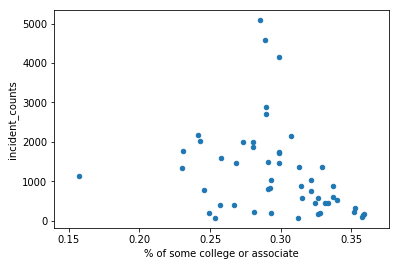

In [17]:
#df_final.plot.scatter('state','% of less than hs')
df_final.plot.scatter('% of some college or associate', 'incident_counts')

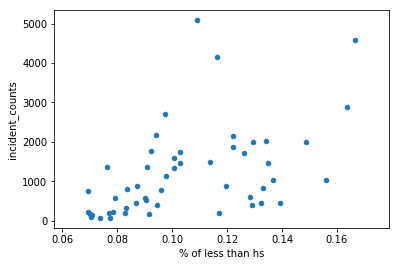

In [18]:
df_final.plot.scatter('% of less than hs', 'incident_counts')

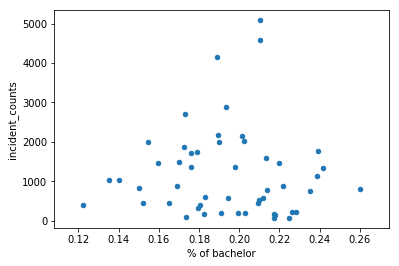

In [19]:
df_final.plot.scatter('% of bachelor', 'incident_counts')

,state,incident_counts,% of less than hs,% of some college or associate,% of bachelor
0,Illinois,5089,0.109093,0.285653,0.210163
1,California,4588,0.166770,0.289084,0.210517
2,Florida,4156,0.116239,0.298912,0.189046
3,Texas,2875,0.163588,0.289606,0.193413
4,Ohio,2701,0.097432,0.289611,0.173134
5,Pennsylvania,2172,0.094221,0.241586,0.189424
6,North Carolina,2141,0.122124,0.306981,0.201216
7,New York,2031,0.134211,0.242524,0.202221
8,Georgia,1994,0.129558,0.280540,0.190198
9,Louisiana,1987,0.148647,0.273183,0.154614
